In [1]:
# load library
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as image
from matplotlib.offsetbox import (OffsetImage, DrawingArea, AnnotationBbox)
from math import pi
from windrose import WindroseAxes
from windrose import WindAxes
import metpy.calc as mpcalc
from metpy.units import units
from scipy import stats
import seaborn as sns

In [3]:
# baca data
logo_bmkg = image.imread('../logo-bmkg.png')
wind_data = pd.read_csv('export-ME48-2018-01-01-2023-09-30.csv') #warning dummy data
wind_data = wind_data.set_index('DATA TIMESTAMP')
wind_data.index = pd.to_datetime(wind_data.index)
wind_data.head()

/var/folders/kq/7wn14yk53ss2nqk26vq5ncx40000gn/T/ipykernel_18075/1254622076.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wind_data.index = pd.to_datetime(wind_data.index)


,WIND DIR DEG DD,WIND SPEED FF
DATA TIMESTAMP,,
2018-01-01 00:00:00+00:00,0,0
2018-01-01 01:00:00+00:00,330,4
2018-01-01 02:00:00+00:00,200,7
2018-01-01 03:00:00+00:00,280,10
2018-01-01 04:00:00+00:00,300,8


In [4]:
# get var
datetime = wind_data.index
wdir = wind_data['WIND DIR DEG DD']
wspd = wind_data['WIND SPEED FF'] * 0.5144 # to m/s

In [5]:
# check na data
wspd[wspd.isna() == True]

Series([], Name: WIND SPEED FF, dtype: float64)

In [6]:
# function windrose(year_start, year_end, **kwargs)     ## **kwargs -> m = int 
# plot weibull distribution curve
def m(m=None):
    return m

def windrose(ystart, yend, **kwargs):
    global wdir_plot, wspd_plot, period

    wdir_year = wdir.loc[((wdir.index.year >= ystart) & (wdir.index.year <= yend))]
    wspd_year = wspd.loc[((wspd.index.year >= ystart) & (wspd.index.year <= yend))]
    month_labels = ['', 'Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
    if m(**kwargs) is None:
        period_start, period_end = [wdir_year.index[0],wdir_year.index[-1]]
        period = 'Periode: '+str(period_start.date())+' - '+str(period_end.date())
        wdir_plot = wdir_year
        wspd_plot = wspd_year
    else: 
        month = m(**kwargs)
        month_label = month_labels[month]
        period = 'Bulan: '+month_label+ ' ' + str(ystart) + ' - ' + str(yend)
        wdir_plot = wdir_year.loc[wdir_year.index.month == month]
        wspd_plot = wspd_year.loc[wspd_year.index.month == month]
    
    # calculate summary
    total_count = wspd_plot.count()
    calm_count = wspd_plot[wspd_plot < 0.5144].count()
    calm_percentage = (calm_count / total_count * 100).round(2)
    wspd_avg = wspd_plot.mean().round(2)
    wspd_max = wspd_plot.max()

    # plot windrose
    plt.figure(1)
    new_labels = ['Timur', 'Timur Laut', 'Utara', 'Barat Laut', 'Barat', 'Barat Daya', 'Selatan', 'Tenggara']
    ax = WindroseAxes.from_ax(theta_labels=new_labels)
    ax.bar(wdir_plot, wspd_plot, normed=True, opening=0.8, bins=np.arange(0.5144, 10, 1.5), cmap=cm.get_cmap('Accent'))
    ax.set_legend(title = 'Kecepatan Angin (m/s)', bbox_to_anchor=(1,-0.1))
    plt.title(period, fontweight='normal', ha='left', x=-0.2, y=1.025)
    plt.suptitle('Windrose: Stamet Raja Haji Fisabilillah - Tanjungpinang', fontweight='bold', ha='left', x=-.06)
    plt.annotate('Ringkasan: \n Jumlah data: '+str(total_count)+' jam \n Angin Calm (<0.5 m/s): '+str(calm_percentage)+'% \n Kecepatan Maksimum: '+f'{wspd_max:.2f}'+' m/s \n Kecepatan Rata-Rata: '+str(wspd_avg)+' m/s \n Arah Angin (berhembus dari)', xy=(-0.2, -0.1), xycoords='axes fraction')

    # add logo bmkg
    imagebox = OffsetImage(logo_bmkg)
    imagebox.image.axes = ax
    xy = [0.3, 0.55]
    ab = AnnotationBbox(imagebox, xy, xybox=(345., 245.), xycoords='data', boxcoords="offset points", pad=0, frameon=False)
    ax.add_artist(ab)
    plt.show()

    # plot weibull distribution curve
    plt.figure(2)
    df_wspd = pd.DataFrame(wspd_plot)
    sns.histplot(data = df_wspd, x = df_wspd['WIND SPEED FF'], kde = True, bins=np.arange(0.0, 15, 0.5))
    plt.xlabel('Kecepatan Angin (m/s)', fontsize='small')
    plt.ylabel('Frekuensi (Jumlah Jam)', fontsize='small')
    plt.title('Kurva Distribusi Weibull Kecepatan Angin \n'+period)
    plt.show()

/var/folders/kq/7wn14yk53ss2nqk26vq5ncx40000gn/T/ipykernel_18075/3190222511.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax.bar(wdir_plot, wspd_plot, normed=True, opening=0.8, bins=np.arange(0.5144, 10, 1.5), cmap=cm.get_cmap('Accent'))


<Figure size 640x480 with 0 Axes>

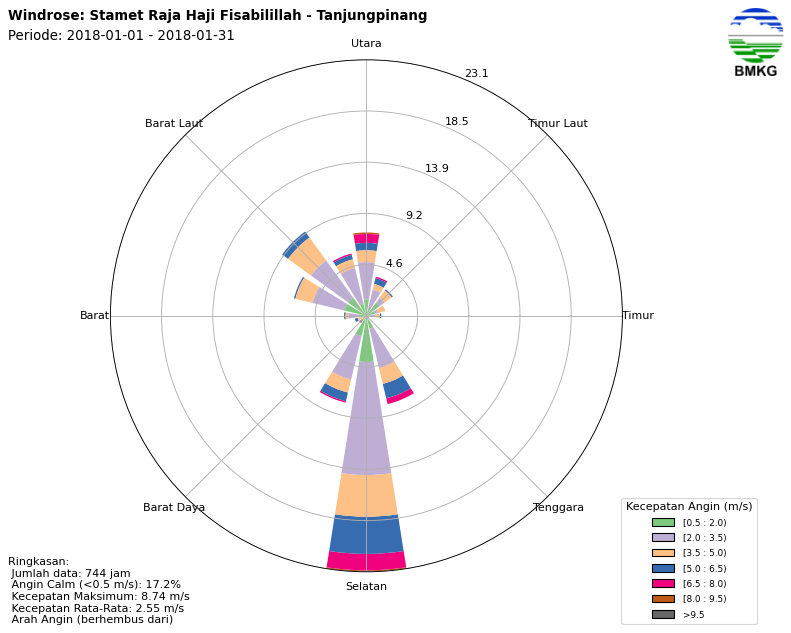

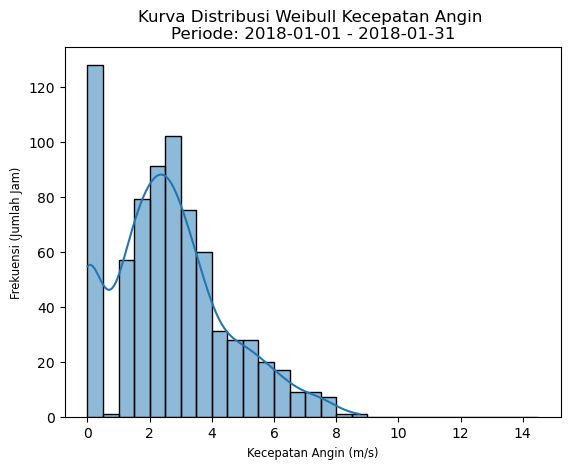

In [10]:
# windrose(year_start, year_end, **kwargs)     
# **kwargs -> m = int 

# function test without month
windrose(2018,2018)

/var/folders/kq/7wn14yk53ss2nqk26vq5ncx40000gn/T/ipykernel_18075/3190222511.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax.bar(wdir_plot, wspd_plot, normed=True, opening=0.8, bins=np.arange(0.5144, 10, 1.5), cmap=cm.get_cmap('Accent'))


<Figure size 640x480 with 0 Axes>

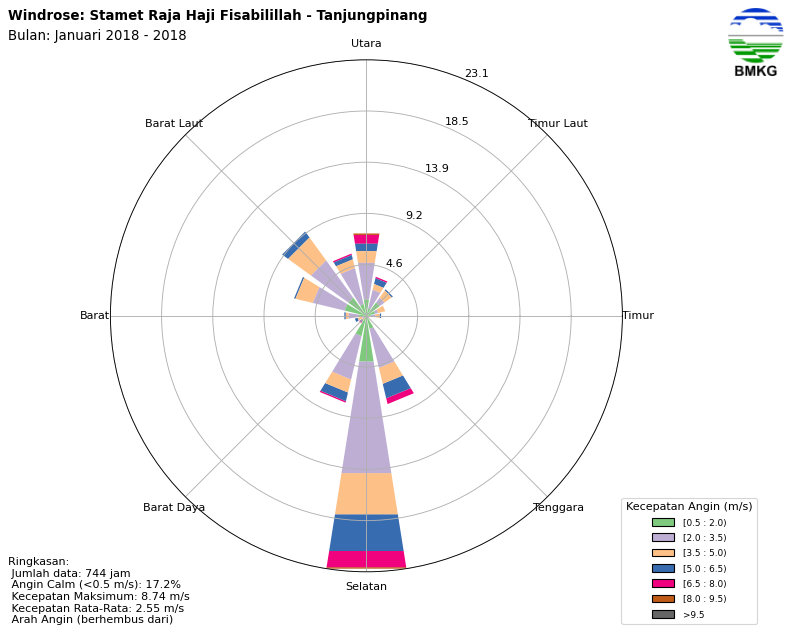

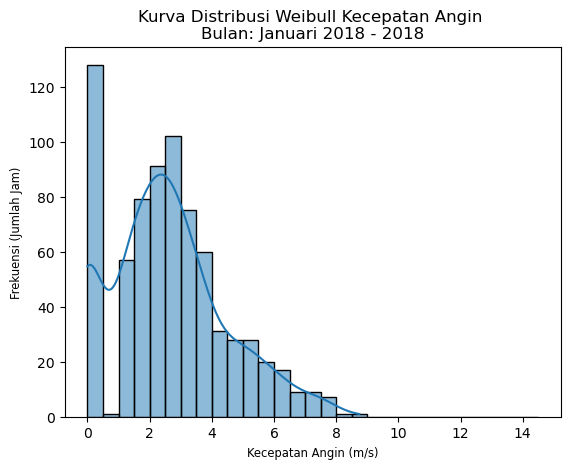

In [9]:
# windrose(year_start, year_end, **kwargs)     
# **kwargs -> m = int 

# function test with month
windrose(2018,2018,m=1)